## Entrenamiento

A continuación, se le entrega el código desarrollado por el equipo anterior.

**Este código contiene errores.**

Se le solicita:
- Arreglar el código entregado.
- Entrenar el modelo.
- Exportar el modelo usando `Pickle`.

### Entregables

- Notebook con la solución a los problemas.

### Presentación

En la presentación, usted tendrá que:
- Explicar y justificar los errores encontrados.
- Explicar y justificar la solución para cada error.

**Nota:**
- Enfóquense sólo en corregir el código entregado.
- Pueden eliminar pasos o líneas de código si lo desean.
- La solución a los errores es directa. No deberían pasar más de 10 minutos en esta sección.
- No es necesario que justifiquen su procedimiento en el informe, pero deben explicar su lógica en la presentación.
- La versión actual de scikit-learn contiene errores. Utilicen versiones anteriores para evitar cualquier problema.


In [1]:
import pandas as pd

df = pd.read_csv("accidents.csv") # leer data
df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Low,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,Rainy,Rural Road,Afternoon,0.0,60.0,4.0,0.0,Moderate,Dry,Car,53.0,45.0,Daylight,0.0
794,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
795,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
796,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


In [2]:
# check de valores nulos
df.isnull().sum().sort_values(ascending = False)

Weather                 40
Driver_Alcohol          40
Driver_Age              40
Road_Type                0
Time_of_Day              0
Traffic_Density          0
Speed_Limit              0
Number_of_Vehicles       0
Accident_Severity        0
Road_Condition           0
Vehicle_Type             0
Driver_Experience        0
Road_Light_Condition     0
Accident                 0
dtype: int64

In [3]:
def preprocess(df):

    """
    Prepara el dataframe para luego ser entrenado. En particular:
    - Imputa valores nulos
    - Genera features para aumentar la explicabilidad del modelo
    """

    df_proc = df.copy()

    # Imputar
    ## Weather
    weather_mode = df_proc["Weather"].mode().iloc[0]
    df_proc["Weather"] = df_proc["Weather"].fillna(weather_mode)

    ## Driver_Alcohol
    df_proc["Driver_Alcohol"] = df_proc["Driver_Alcohol"].fillna(0)

    ## Driver_Age
    age_mean = df_proc["Driver_Age"].mean()
    df_proc["Driver_Age"] = df_proc["Driver_Age"].fillna(age_mean)

    # Feature Engineering
    df_proc["Speed_Accident"] = df_proc["Speed_Limit"] * df_proc["Accident"]
    df_proc["Traffic_Norm"] = df_proc["Traffic_Density"] - df_proc["Traffic_Density"].mean()

    return df_proc

df_proc = preprocess(df)

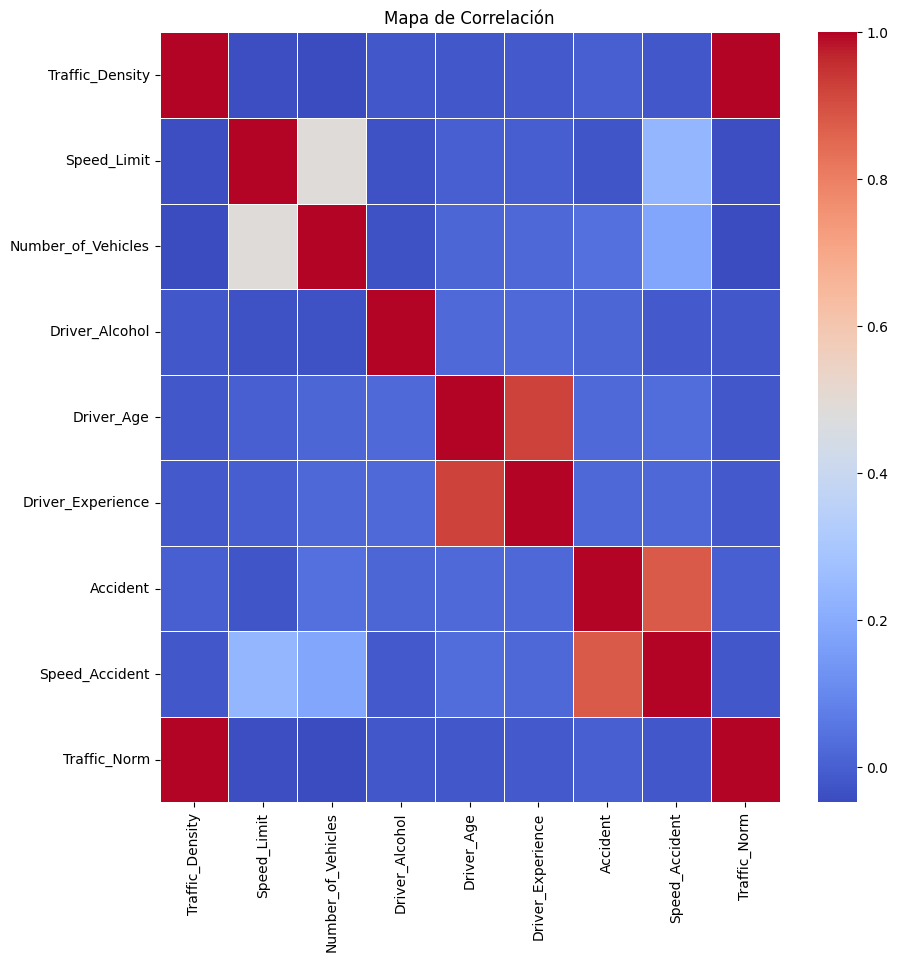

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlacion = df_proc.select_dtypes(include=np.number).corr()


# Crear el heatmap
plt.figure(figsize=(10, 10))  # Tamaño del gráfico
sns.heatmap(correlacion,annot=False, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Correlación")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

target = "Accident"

X = df_proc.drop(columns = [target,"Speed_Accident"])
y = df_proc[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify=y)
X_train

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Traffic_Norm
414,Clear,Highway,Night,1.0,100.0,5.0,1.0,Moderate,Dry,Car,67.0,64.0,Daylight,-0.011278
137,Rainy,Rural Road,Afternoon,0.0,80.0,2.0,0.0,Low,Dry,Car,45.0,39.0,Artificial Light,-1.011278
395,Snowy,Rural Road,Evening,0.0,100.0,5.0,0.0,Low,Dry,Car,28.0,21.0,Artificial Light,-1.011278
328,Clear,Highway,Evening,2.0,50.0,4.0,0.0,High,Dry,Motorcycle,27.0,18.0,No Light,0.988722
364,Rainy,City Road,Afternoon,0.0,60.0,3.0,0.0,High,Icy,Car,34.0,27.0,Artificial Light,-1.011278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Rainy,City Road,Afternoon,2.0,30.0,2.0,0.0,Low,Dry,Truck,50.0,48.0,Artificial Light,0.988722
582,Foggy,City Road,Evening,0.0,50.0,3.0,0.0,Low,Under Construction,Motorcycle,61.0,61.0,Daylight,-1.011278
748,Snowy,Rural Road,Afternoon,2.0,100.0,4.0,0.0,Low,Dry,Car,40.0,36.0,Daylight,0.988722
131,Clear,Highway,Afternoon,2.0,60.0,4.0,0.0,Low,Wet,Car,62.0,61.0,Artificial Light,0.988722


In [7]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
import numpy as np

categorical_variables = X_train.select_dtypes(include=["object", "category"]).columns

categorical_pipeline = Pipeline([
    ("OneHot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

numeric_variables = X_train.select_dtypes(include=np.number).columns

numeric_pipeline = Pipeline([
    ("Scaler", RobustScaler())
])

ct = ColumnTransformer([
    ("categorical_pipeline", categorical_pipeline, categorical_variables),
    ("numeric_pipeline", numeric_pipeline, numeric_variables)
])

pipeline = Pipeline([
    ("column_transformer", ct),
    ("model", XGBClassifier())
])

pipeline

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'],
      dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(ste...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [8]:
from sklearn.metrics import classification_report

# Fit
pipeline.fit(X_train, y_train)

# Medir performance
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       112
         1.0       0.35      0.27      0.31        48

    accuracy                           0.63       160
   macro avg       0.53      0.53      0.53       160
weighted avg       0.61      0.63      0.62       160



In [9]:
# código para exportar modelo
import pickle

with open('modelo.pkl', 'wb') as modelo:
    pickle.dump(pipeline, modelo)